# Advanced Model Comparison

Comparing advanced models with enhanced feature engineering against basic models for performance improvement analysis.


In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Load advanced model results
advanced_results_dir = '../../models/advanced/'

try:
    with open(f'{advanced_results_dir}/linear_advanced_results.pkl', 'rb') as f:
        linear_advanced_results = pickle.load(f)
    with open(f'{advanced_results_dir}/ridge_advanced_results.pkl', 'rb') as f:
        ridge_advanced_results = pickle.load(f)
    with open(f'{advanced_results_dir}/random_forest_advanced_results.pkl', 'rb') as f:
        rf_advanced_results = pickle.load(f)
    
    print("✓ All advanced model results loaded")
    
except FileNotFoundError as e:
    print(f"⚠️ Missing results file: {e}")
    print("Please run notebooks 4-2, 4-3, and 4-4 first")


✓ All advanced model results loaded


In [2]:
# Advanced model performance comparison
advanced_comparison = pd.DataFrame([linear_advanced_results, ridge_advanced_results, rf_advanced_results])

print("=== ADVANCED MODEL PERFORMANCE COMPARISON (CV Results) ===")
print(f"{'Model':<30} {'RMSE':<12} {'MAE':<12} {'R²':<12}")
print("-" * 66)

for _, row in advanced_comparison.iterrows():
    print(f"{row['model_name']:<30} "
          f"${row['cv_rmse']:<11,.0f} "
          f"${row['cv_mae']:<11,.0f} "
          f"{row['cv_r2']:<12.4f}")

# Standard deviations
print(f"\nStandard Deviations:")
print(f"{'Model':<30} {'RMSE_std':<12} {'MAE_std':<12} {'R²_std':<12}")
print("-" * 66)

for _, row in advanced_comparison.iterrows():
    print(f"{row['model_name']:<30} "
          f"±${row['cv_rmse_std']:<11,.0f} "
          f"±${row['cv_mae_std']:<11,.0f} "
          f"±{row['cv_r2_std']:<12.4f}")


=== ADVANCED MODEL PERFORMANCE COMPARISON (CV Results) ===
Model                          RMSE         MAE          R²          
------------------------------------------------------------------
Linear Regression (Advanced)   $26,940      $18,073      0.8775      
Ridge Regression (Advanced)    $22,672      $14,371      0.9122      
Random Forest (Advanced)       $27,944      $17,361      0.8734      

Standard Deviations:
Model                          RMSE_std     MAE_std      R²_std      
------------------------------------------------------------------
Linear Regression (Advanced)   ±$1,614       ±$610         ±0.0269      
Ridge Regression (Advanced)    ±$996         ±$653         ±0.0207      
Random Forest (Advanced)       ±$5,837       ±$936         ±0.0244      


In [3]:
# Best advanced model selection
best_advanced_model = advanced_comparison.loc[advanced_comparison['cv_r2'].idxmax()]

print("\n=== BEST ADVANCED MODEL (CV Performance) ===")
print(f"🏆 {best_advanced_model['model_name']}")
print(f"CV R²: {best_advanced_model['cv_r2']:.4f} (±{best_advanced_model['cv_r2_std']:.4f})")
print(f"CV RMSE: ${best_advanced_model['cv_rmse']:,.0f} (±${best_advanced_model['cv_rmse_std']:,.0f})")
print(f"CV MAE: ${best_advanced_model['cv_mae']:,.0f} (±${best_advanced_model['cv_mae_std']:,.0f})")

# Load and compare with basic models
print("\n=== COMPARISON WITH BASIC MODELS ===")
try:
    basic_results_dir = '../../models/basic/'
    
    with open(f'{basic_results_dir}/linear_results.pkl', 'rb') as f:
        basic_linear = pickle.load(f)
    with open(f'{basic_results_dir}/ridge_results.pkl', 'rb') as f:
        basic_ridge = pickle.load(f)
    with open(f'{basic_results_dir}/random_forest_results.pkl', 'rb') as f:
        basic_rf = pickle.load(f)
    
    basic_comparison = pd.DataFrame([basic_linear, basic_ridge, basic_rf])
    
    print("Basic vs Advanced Model Performance (CV Results):")
    print(f"{'Model Type':<15} {'Basic R²':<12} {'Advanced R²':<15} {'Improvement':<12}")
    print("-" * 54)
    
    model_pairs = [
        ('Linear', basic_linear['cv_r2'], linear_advanced_results['cv_r2']),
        ('Ridge', basic_ridge['cv_r2'], ridge_advanced_results['cv_r2']),
        ('Random Forest', basic_rf['cv_r2'], rf_advanced_results['cv_r2'])
    ]
    
    for model_type, basic_r2, advanced_r2 in model_pairs:
        improvement = ((advanced_r2 - basic_r2) / basic_r2) * 100
        print(f"{model_type:<15} {basic_r2:<12.4f} {advanced_r2:<15.4f} {improvement:+7.1f}%")
    
    # Best basic model
    best_basic_model = basic_comparison.loc[basic_comparison['cv_r2'].idxmax()]
    
    print(f"\nBest Basic Model: {best_basic_model['model_name']}")
    print(f"  CV R²: {best_basic_model['cv_r2']:.4f}")
    print(f"  CV RMSE: ${best_basic_model['cv_rmse']:,.0f}")
    
    # Overall improvement
    overall_r2_improvement = ((best_advanced_model['cv_r2'] - best_basic_model['cv_r2']) / best_basic_model['cv_r2']) * 100
    rmse_improvement = ((best_basic_model['cv_rmse'] - best_advanced_model['cv_rmse']) / best_basic_model['cv_rmse']) * 100
    
    print(f"\n📈 OVERALL IMPROVEMENT:")
    print(f"  R² improvement: {overall_r2_improvement:+.1f}%")
    print(f"  RMSE improvement: {rmse_improvement:+.1f}%")
    
except FileNotFoundError:
    print("⚠️ Basic model results not found for comparison")
    print("Please run notebooks 3-1, 3-2, and 3-3 first")

# Create comparison table for CSV export
advanced_comparison_table = []
for results in [linear_advanced_results, ridge_advanced_results, rf_advanced_results]:
    advanced_comparison_table.append({
        'Model': results['model_name'],
        'RMSE': results['cv_rmse'],
        'RMSE_std': results['cv_rmse_std'],
        'MAE': results['cv_mae'],
        'MAE_std': results['cv_mae_std'],
        'R²': results['cv_r2'],
        'R²_std': results['cv_r2_std']
    })

advanced_comparison_df = pd.DataFrame(advanced_comparison_table)
advanced_comparison_df = advanced_comparison_df.sort_values('RMSE')  # Sort by RMSE (lower is better)

print("\n✓ Advanced model comparison completed")



=== BEST ADVANCED MODEL (CV Performance) ===
🏆 Ridge Regression (Advanced)
CV R²: 0.9122 (±0.0207)
CV RMSE: $22,672 (±$996)
CV MAE: $14,371 (±$653)

=== COMPARISON WITH BASIC MODELS ===
Basic vs Advanced Model Performance (CV Results):
Model Type      Basic R²     Advanced R²     Improvement 
------------------------------------------------------
Linear          0.8448       0.8775             +3.9%
Ridge           0.9158       0.9122             -0.4%
Random Forest   0.8563       0.8734             +2.0%

Best Basic Model: Ridge Regression
  CV R²: 0.9158
  CV RMSE: $22,145

📈 OVERALL IMPROVEMENT:
  R² improvement: -0.4%
  RMSE improvement: -2.4%

✓ Advanced model comparison completed


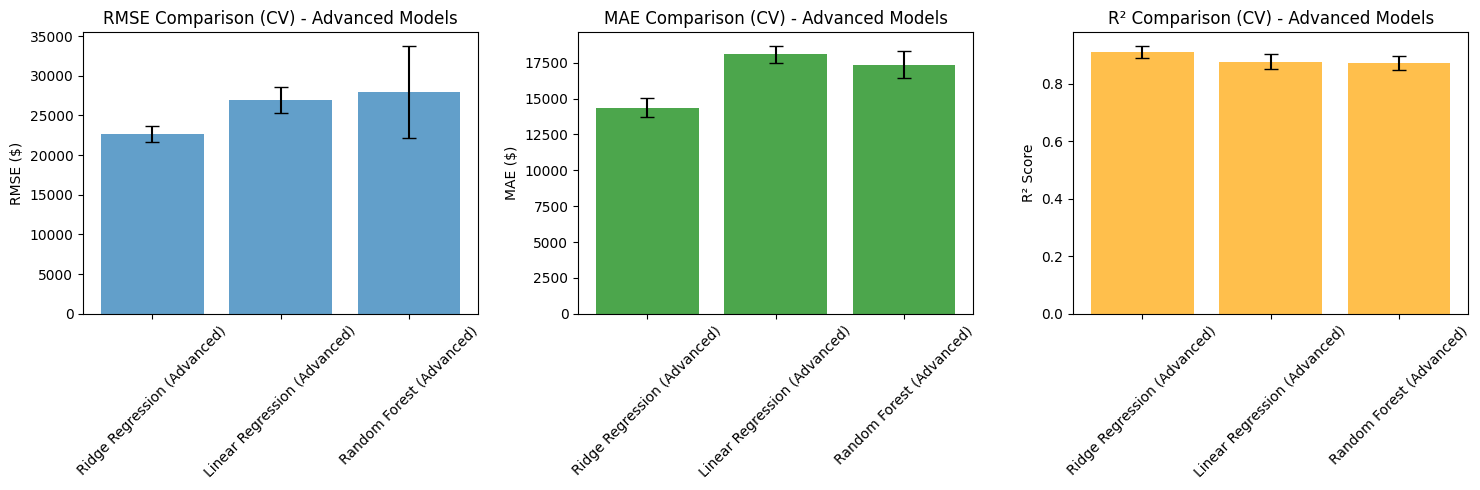

In [4]:
# Visualization
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# RMSE comparison
axes[0].bar(advanced_comparison_df['Model'], advanced_comparison_df['RMSE'], 
           yerr=advanced_comparison_df['RMSE_std'], capsize=5, alpha=0.7)
axes[0].set_title('RMSE Comparison (CV) - Advanced Models')
axes[0].set_ylabel('RMSE ($)')
axes[0].tick_params(axis='x', rotation=45)

# MAE comparison
axes[1].bar(advanced_comparison_df['Model'], advanced_comparison_df['MAE'], 
           yerr=advanced_comparison_df['MAE_std'], capsize=5, alpha=0.7, color='green')
axes[1].set_title('MAE Comparison (CV) - Advanced Models')
axes[1].set_ylabel('MAE ($)')
axes[1].tick_params(axis='x', rotation=45)

# R² comparison
axes[2].bar(advanced_comparison_df['Model'], advanced_comparison_df['R²'], 
           yerr=advanced_comparison_df['R²_std'], capsize=5, alpha=0.7, color='orange')
axes[2].set_title('R² Comparison (CV) - Advanced Models')
axes[2].set_ylabel('R² Score')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [5]:
# Save advanced model comparison results
best_advanced = advanced_comparison_df.iloc[0]

advanced_comparison_summary = {
    'comparison_table': advanced_comparison_df.to_dict('records'),
    'best_model': {
        'name': best_advanced['Model'],
        'rmse': best_advanced['RMSE'],
        'rmse_std': best_advanced['RMSE_std'],
        'mae': best_advanced['MAE'],
        'mae_std': best_advanced['MAE_std'],
        'r2': best_advanced['R²'],
        'r2_std': best_advanced['R²_std']
    },
    'model_ranking': advanced_comparison_df['Model'].tolist()
}

# Add basic vs advanced comparison if basic models exist
try:
    if 'basic_comparison' in locals():
        best_basic = basic_comparison.loc[basic_comparison['cv_r2'].idxmax()]
        
        advanced_comparison_summary['vs_basic'] = {
            'best_basic_model': best_basic['model_name'],
            'best_basic_r2': best_basic['cv_r2'],
            'best_basic_rmse': best_basic['cv_rmse'],
            'improvement_r2_pct': ((best_advanced['R²'] - best_basic['cv_r2']) / best_basic['cv_r2']) * 100,
            'improvement_rmse_pct': ((best_basic['cv_rmse'] - best_advanced['RMSE']) / best_basic['cv_rmse']) * 100
        }
except:
    pass

import os
import pickle
os.makedirs('../../models/advanced/', exist_ok=True)
with open('../../models/advanced/comparison_summary.pkl', 'wb') as f:
    pickle.dump(advanced_comparison_summary, f)

# Export to CSV for easy viewing
advanced_comparison_df.to_csv('../../models/advanced/model_comparison.csv', index=False)

print("✓ Advanced model comparison files saved")
print(f"✓ Results saved to models/advanced/comparison_summary.pkl")
print(f"✓ CSV exported to models/advanced/model_comparison.csv")
print(f"\n🏆 Best Advanced Model: {best_advanced['Model']}")
print(f"   RMSE: ${best_advanced['RMSE']:,.0f} (±${best_advanced['RMSE_std']:,.0f})")
print(f"   MAE:  ${best_advanced['MAE']:,.0f} (±${best_advanced['MAE_std']:,.0f})")
print(f"   R²:   {best_advanced['R²']:.4f} (±{best_advanced['R²_std']:.4f})")


✓ Advanced model comparison files saved
✓ Results saved to models/advanced/comparison_summary.pkl
✓ CSV exported to models/advanced/model_comparison.csv

🏆 Best Advanced Model: Ridge Regression (Advanced)
   RMSE: $22,672 (±$996)
   MAE:  $14,371 (±$653)
   R²:   0.9122 (±0.0207)
